# **TC2-DS- Experiment 5**

*    **SIA VASHIST**
*    PRN: 20190802107


---

# • <U>AIM</U> - Perform Data Wrangling on an open source DataSet.


# • <u>DataSet</u> - Titanic 



# • <U>Source</U>: KAGGLE 



# • **LIBRARIES USED :** 

> NUMPY |
> PANDAS |
> MATPLOTLIB |
> Seaborn


---

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [2]:
#Loading the Titanic Dataset =
Titanic_df = pd.read_csv(r'C:\sia\Titanic_Dataset.csv')
print("The Dataset is as Follows:")
print(Titanic_df.dropna(), '\n')

The Dataset is as Follows:
     PassengerId  Survived  Pclass  \
1              2         1       1   
3              4         1       1   
6              7         0       1   
10            11         1       3   
11            12         1       1   
..           ...       ...     ...   
871          872         1       1   
872          873         0       1   
879          880         1       1   
887          888         1       1   
889          890         1       1   

                                                  Name  Gender   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
10                     Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
..                                        

# <u>Variable Descriptions for Titanic DataSet are as follows</u>:
> Pclass | Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

> survival | Survival (0 = No; 1 = Yes)

> name | Name

> gender | Gender

> age | Age

> sibsp | Number of Siblings/Spouses Aboard

> parch | Number of Parents/Children Aboard

> ticket | Ticket Number

> fare | Passenger Fare (British pound)

> cabin | Cabin

> embarked | Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [3]:
#Checking for null values
Titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
#Checking for DataSet info
Titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# <u><i>Observation</i></u>:
We have only 714 Age values out of 891 of the entries and 2 values missing from the Embarked Variable. We will have to decide whether to omit these or impute them with some values when we model relationships based on Age or Embarked.


In [5]:
#Descriptive Stats
Titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#Checking the "0" values if present
for col in Titanic_df: print(col +" "+str(Titanic_df[Titanic_df[col]==0].shape[0]))


PassengerId 0
Survived 549
Pclass 0
Name 0
Gender 0
Age 0
SibSp 608
Parch 678
Ticket 0
Fare 15
Cabin 0
Embarked 0


In [7]:
#Checking The Fare column where 0 values are present
Titanic_df[Titanic_df["Fare"]==0]

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


---

# • Data Cleaning & Handling Missing Values:

In [8]:
#dropping column not in use and having maximum number of null values i.e. Cabin column
df_cleaned = Titanic_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
print("Shape of the data -->",df_cleaned.shape) ,df_cleaned.head()


Shape of the data --> (891, 8)


(None,
    Survived  Pclass  Gender   Age  SibSp  Parch     Fare Embarked
 0         0       3    male  22.0      1      0   7.2500        S
 1         1       1  female  38.0      1      0  71.2833        C
 2         1       3  female  26.0      0      0   7.9250        S
 3         1       1  female  35.0      1      0  53.1000        S
 4         0       3    male  35.0      0      0   8.0500        S)

# <u><i>Observation</i></u>:
From common sense, columns such as PassengerId, Name and Ticket number shouldn't be related to the survival probability. So these columns can be droped. It is also seen that there are missing values in Age and Cabin columns which needs to be handeled properly.


In [9]:
df_cleaned.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
#Dropna Embarked
Titanic_df.dropna(subset=["Embarked"],inplace=True)
# Filling Age with its mean value
Titanic_df.fillna(Titanic_df["Age"].mean(), inplace=True) 
set
# Filling Cabin with 0
Titanic_df.fillna(Titanic_df["Cabin"].mode(),inplace=True)

In [11]:
#Checking for null values:
Titanic_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Gender         0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [12]:
#Checking skewness
Titanic_df.skew()

PassengerId    0.000000
Survived       0.484568
Pclass        -0.636998
Age            0.434355
SibSp          3.691058
Parch          2.745160
Fare           4.801440
dtype: float64

---

#  Dimensions of the Dataset using: Shape, Size, Ndim

In [13]:
# Shape the dataset
Titanic_df.shape

(889, 12)

In [14]:
Titanic_df.size

10668

In [15]:
Titanic_df.ndim

2

---

#  Displaying Top 10 Rows & Bottom 10 rows

In [16]:
print("The Top 10 rows of Dataset are as Follows:")
Titanic_df.head(10)

The Top 10 rows of Dataset are as Follows:


,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,29.642093,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,29.642093,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,29.642093,S
5,6,0,3,"Moran, Mr. James",male,29.642093,0,0,330877,8.4583,29.642093,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,29.642093,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,29.642093,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,29.642093,C


In [17]:
print("The Bottom 10 rows of Dataset are as Follows:")
Titanic_df.tail(10)


The Bottom 10 rows of Dataset are as Follows:


,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.000000,0,0,349257,7.8958,29.642093,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.000000,0,0,7552,10.5167,29.642093,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.000000,0,0,C.A./SOTON 34068,10.5000,29.642093,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.000000,0,0,SOTON/OQ 392076,7.0500,29.642093,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.000000,0,5,382652,29.1250,29.642093,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,29.642093,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.642093,1,2,W./C. 6607,23.4500,29.642093,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.000000,0,0,370376,7.7500,29.642093,Q


---

#  Displaying Random rows 

In [18]:
#Displaying random rows
#Titanic_df.sample(n=10)
random_row = Titanic_df.iloc[np.random.choice(np.arange(len(Titanic_df)), size=10)]
print(random_row)

     PassengerId  Survived  Pclass  \
203          204         0       3   
351          352         0       1   
466          467         0       2   
371          372         0       3   
216          217         1       3   
205          206         0       3   
366          367         1       1   
808          809         0       2   
119          120         0       3   
853          854         1       1   

                                                 Name  Gender        Age  \
203                              Youseff, Mr. Gerious    male  45.500000   
351            Williams-Lambert, Mr. Fletcher Fellows    male  29.642093   
466                             Campbell, Mr. William    male  29.642093   
371                         Wiklund, Mr. Jakob Alfred    male  18.000000   
216                            Honkanen, Miss. Eliina  female  27.000000   
205                        Strom, Miss. Telma Matilda  female   2.000000   
366  Warren, Mrs. Frank Manley (Anna Sophia Atkin

# Slicing Columns
> iloc : Numerical

> loc : String 

In [19]:
Titanic_df.iloc[:,[0,2,-1]]

,PassengerId,Pclass,Embarked
0,1,3,S
1,2,1,C
2,3,3,S
3,4,1,S
4,5,3,S
...,...,...,...
886,887,2,S
887,888,1,S
888,889,3,S
889,890,1,C


---

# Condition Specific output display

In [20]:
S= Titanic_df.loc[Titanic_df["Embarked"] == "S"]
S

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,29.642093,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,29.642093,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,29.642093,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
...,...,...,...,...,...,...,...,...,...,...,...,...
883,884,0,2,"Banfield, Mr. Frederick James",male,28.000000,0,0,C.A./SOTON 34068,10.5000,29.642093,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.000000,0,0,SOTON/OQ 392076,7.0500,29.642093,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,29.642093,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S


In [21]:
C= Titanic_df.loc[Titanic_df["Embarked"] == "C"]
C

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,29.642093,C
19,20,1,3,"Masselmani, Mrs. Fatima",female,29.642093,0,0,2649,7.2250,29.642093,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,29.642093,0,0,2631,7.2250,29.642093,C
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.000000,0,0,PC 17601,27.7208,29.642093,C
...,...,...,...,...,...,...,...,...,...,...,...,...
866,867,1,2,"Duran y More, Miss. Asuncion",female,27.000000,1,0,SC/PARIS 2149,13.8583,29.642093,C
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.000000,1,0,P/PP 3381,24.0000,29.642093,C
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.000000,0,0,2667,7.2250,29.642093,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.000000,0,1,11767,83.1583,C50,C


In [22]:
Q= Titanic_df.loc[Titanic_df["Embarked"] == "Q"]
Q

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,29.642093,0,0,330877,8.4583,29.642093,Q
16,17,0,3,"Rice, Master. Eugene",male,2.000000,4,1,382652,29.1250,29.642093,Q
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.000000,0,0,330923,8.0292,29.642093,Q
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,29.642093,0,0,330959,7.8792,29.642093,Q
32,33,1,3,"Glynn, Miss. Mary Agatha",female,29.642093,0,0,335677,7.7500,29.642093,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
790,791,0,3,"Keane, Mr. Andrew ""Andy""",male,29.642093,0,0,12460,7.7500,29.642093,Q
825,826,0,3,"Flynn, Mr. John",male,29.642093,0,0,368323,6.9500,29.642093,Q
828,829,1,3,"McCormack, Mr. Thomas Joseph",male,29.642093,0,0,367228,7.7500,29.642093,Q
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.000000,0,5,382652,29.1250,29.642093,Q


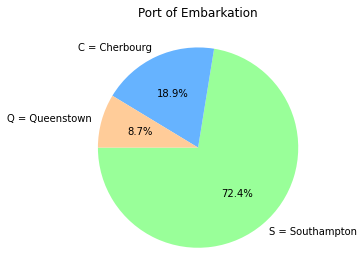

In [23]:
slices = Titanic_df["Embarked"].value_counts()

plt.pie(x=slices, labels=["S = Southampton", "C = Cherbourg", "Q = Queenstown"], colors=['#99ff99', '#66b3ff', '#ffcc99'], autopct='%1.1f%%', startangle=180)
plt.title("Port of Embarkation")
plt.savefig("01. Boarding.png")

# Equal aspect ratio ensures that pie is drawn as a circle 
plt.tight_layout()
plt.show()

# <u><i> Observation</i></u>:
> Compared to Cherbourg and Queenstown, Southampton has a larger population.

> Around 73% of the data is occupied by Southampton, whereas Cherbourg occupies 18.9% and Queenstown 8.7%.

---

# • Determining Datatype

In [24]:
#Classifications of DataTypes:
print("The Classifications of Data are as follows:")
print(Titanic_df.dtypes, '\n')

The Classifications of Data are as follows:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object 



In [25]:
Categorical_columns = Titanic_df.dtypes[Titanic_df.dtypes == 'object'].index
print('Number of categorical variables:', len(Categorical_columns), '\n')
print(Categorical_columns)

Number of categorical variables: 5 

Index(['Name', 'Gender', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


In [26]:
Numerical_columns = Titanic_df.dtypes[Titanic_df.dtypes != 'object'].index
print('Number of numerical variables:', len(Numerical_columns), '\n')
print(Numerical_columns)

Number of numerical variables: 7 

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


In [27]:
#Separating the numeric columns and categorical columns
Numerical = Titanic_df.drop(columns=["Name","Gender","Cabin","Ticket","Embarked"]) 
Categorical = Titanic_df[["Name", "Gender", "Ticket", "Cabin", "Embarked"]]
print("Numerical Datatype Columns are as follows:",'\n',Numerical)
print("*"*100)
print("\n")
print("Categorical Datatype Columns are as follows:",'\n',Categorical)

Numerical Datatype Columns are as follows: 
      PassengerId  Survived  Pclass        Age  SibSp  Parch     Fare
0              1         0       3  22.000000      1      0   7.2500
1              2         1       1  38.000000      1      0  71.2833
2              3         1       3  26.000000      0      0   7.9250
3              4         1       1  35.000000      1      0  53.1000
4              5         0       3  35.000000      0      0   8.0500
..           ...       ...     ...        ...    ...    ...      ...
886          887         0       2  27.000000      0      0  13.0000
887          888         1       1  19.000000      0      0  30.0000
888          889         0       3  29.642093      1      2  23.4500
889          890         1       1  26.000000      0      0  30.0000
890          891         0       3  32.000000      0      0   7.7500

[889 rows x 7 columns]
****************************************************************************************************




In [28]:
# Converting categorical column to numerical column using OneHotEncoder
cat_to_conv = ["Gender", "Cabin", "Embarked"]
Titanic_df = pd.get_dummies(Titanic_df, columns=cat_to_conv)
Titanic_df.shape

(889, 161)

In [29]:
# Dataset after converting categorical columns to numerical columns
Titanic_df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Gender_female,...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,...,0,0,0,0,0,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,...,0,0,0,0,0,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,...,0,0,0,0,0,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,...,0,0,0,0,0,0,0,0,0,1


# <u><i>Observation:</i></u>

Males represent for 65% of data, which is more frequently than females. 644 out of 889 were covered by Embarked S.

---

# <u><i>Observation for DataTypes</i></u>:
> Categorical/Nominal: Variables that can be divided into multiple categories but having no order or priority. 
Eg. Embarked (C = Cherbourg; Q = Queenstown; S = Southampton)

> Binary: A subtype of categorical features in which the variable only has two options. For example, gender (male/female).

> Ordinal: Ordinal features are similar to categorical features, but they are ordered (i.e can be sorted). Pclass, for example (1, 2, 3)

> Continuous: They can take any value in a column between the minimum and maximum values. For example, Age and Fare.

> Count: They represent the count of a variable. Eg. SibSp, Parch

> Useless: They are ineffective because they contribute nothing to the final outcome. This category may include PassengerId, Name, Cabin, and Ticket.

---

# • Data Visualization:

# Survive Count:

In [30]:
# Group the data frame by values in Survived column, and count the number of occurrences of each group.
survived_count = Titanic_df.groupby('Survived')['Survived'].count()
survived_count

Survived
0    549
1    340
Name: Survived, dtype: int64

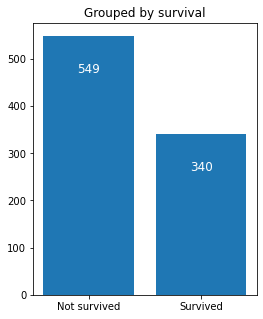

In [31]:
# Grouped by survival
plt.figure(figsize=(4,5))
plt.bar(survived_count.index, survived_count.values)
plt.title('Grouped by survival')
plt.xticks([0,1],['Not survived', 'Survived'])
for i, value in enumerate(survived_count.values):
    plt.text(i, value-70, str(value), fontsize=12, color='white',
             horizontalalignment='center', verticalalignment='center')
plt.show()

# For Ticket Class:

In [32]:
# Group the data frame by classes in the pclass column, and count the number of occurrences of each group.
pclass_count = Titanic_df.groupby('Pclass')['Pclass'].count()
pclass_count

Pclass
1    214
2    184
3    491
Name: Pclass, dtype: int64

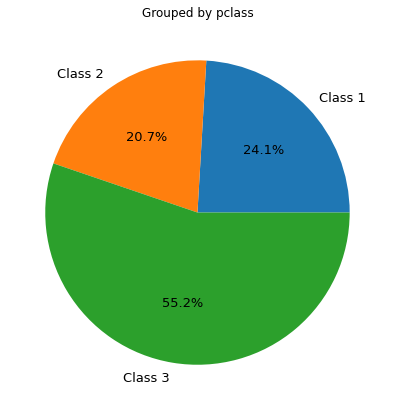

In [33]:
plt.figure(figsize=(7,7))
plt.title('Grouped by pclass')
plt.pie(pclass_count.values, labels=['Class 1', 'Class 2', 'Class 3'], 
 autopct='%1.1f%%', textprops={'fontsize':13})
plt.show()

# Gender Count

In [34]:
sex_count = df_cleaned.groupby('Gender')['Gender'].count()
sex_count

Gender
female    314
male      577
Name: Gender, dtype: int64

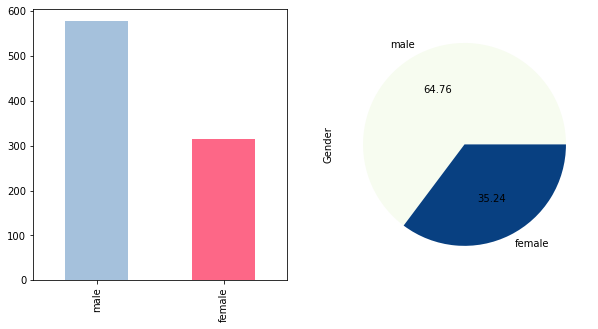

In [35]:
# Group the data frame by classes in the pclass column, and count the number of occurrences of each group.
fig,axes = plt.subplots(1,2, figsize=(10,5))
df_cleaned["Gender"].value_counts().plot(kind="bar", ax=axes[0], color =['#A5C1DC','#FD6787'])
df_cleaned["Gender"].value_counts().plot(kind="pie",ax=axes[1],autopct='%0.2f' ,colormap="GnBu")
plt.show()

# <u><i>Observation</i></u>:
> In the above graph, The bar plot in the above graph indicates that there are 75% men and 25% women in the Titanic dataset, however the composition is not made clear.

> Male is 64.76% and female is 35.24% in the statistics compiled.

---

# Categorical vs. Quantitative:

## • Gender Vs Survived

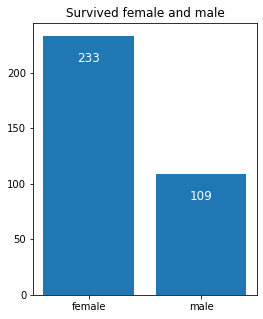

Percentage of females who survived: 74.20382165605095
Percentage of males who survived: 18.890814558058924


In [36]:
#Survivial number according to gender or sex i.e. Male and Female
survived_sex = df_cleaned.groupby('Gender')['Survived'].sum()
plt.figure(figsize=(4,5))
plt.bar(survived_sex.index, survived_sex.values)
plt.title('Survived female and male')
for i, value in enumerate(survived_sex.values):
    plt.text(i, value-20, str(value), fontsize=12, color='white',
             horizontalalignment='center', verticalalignment='center')
plt.show()

print("Percentage of females who survived:", df_cleaned["Survived"][df_cleaned["Gender"] == 'female'].value_counts(normalize = True)[1]*100)

print("Percentage of males who survived:", df_cleaned["Survived"][df_cleaned["Gender"] == 'male'].value_counts(normalize = True)[1]*100)

## • Pclass Vs Survived

In [37]:
grouped_by_pclass = df_cleaned.groupby(['Pclass', 'Survived', 'Gender'])
grouped_by_pclass.size()

Pclass  Survived  Gender
1       0         female      3
                  male       77
        1         female     91
                  male       45
2       0         female      6
                  male       91
        1         female     70
                  male       17
3       0         female     72
                  male      300
        1         female     72
                  male       47
dtype: int64

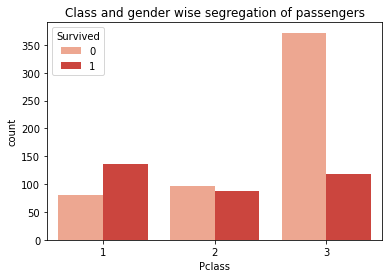

Percentage of 1st class who survived: 62.96296296296296
Percentage of 2nd class who survived: 47.28260869565217
Percentage of 3rd class who survived: 24.236252545824847


In [38]:
#sns.plt.suptitle('Class and gender wise segregation of passengers', fontsize=16)
plt.title('Class and gender wise segregation of passengers')
sns.countplot(x="Pclass", hue="Survived", data=df_cleaned, palette="Reds" ,)
plt.show()


print("Percentage of 1st class who survived:", df_cleaned["Survived"][df_cleaned["Pclass"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of 2nd class who survived:", df_cleaned["Survived"][df_cleaned["Pclass"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of 3rd class who survived:", df_cleaned["Survived"][df_cleaned["Pclass"] == 3].value_counts(normalize = True)[1]*100)


> 62% of first-class passengers survived the Titanic disaster, whereas 47% of second-class passengers and only 24% of third-class passengers survived.
---

## Categorical vs. Categorical

Categorical: Survived, Gender, and Embarked |Ordinal: Pclass.

Survived    0    1
Gender            
female     81  233
male      468  109


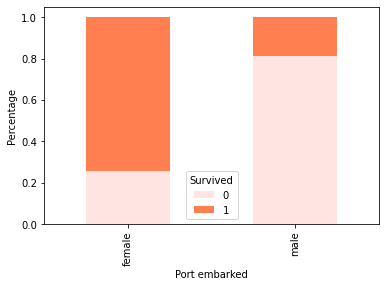

In [39]:
tab = pd.crosstab(df_cleaned['Gender'], df_cleaned['Survived'])
print(tab)

dummy = tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True , color=['mistyrose','coral'])
dummy = plt.xlabel('Port embarked')
dummy = plt.ylabel('Percentage')

> In males the survival rate is low, whereas in females the survival rate is high.
---

## Quantitative vs. Quantitative:
Numerical Features: Age (Continuous), Fare (Continuous)

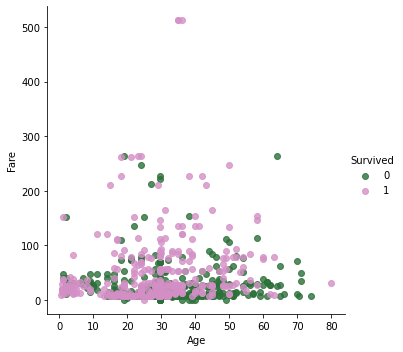

In [40]:
#Scatter plot for showing age & fare with target varialble
sns.lmplot(x='Age', y='Fare', hue='Survived',  data=Titanic_df.loc[Titanic_df['Survived'].isin([1,0])], fit_reg=False ,palette = "cubehelix")
plt.show()

> Fare feature seems to have a significative correlation with the survival probability.
---

# Conclusion:
> • Hence, we have successfully cleaned the data, evaluated the data set's dimensions, displayed rows randomly, divided columns, checked the condition-specific outputs, and identified the variable data types in the dataset. We also Visualised data between different data types & drew observations.

> • The following columns have been removed: PassengerId, Name, Ticket, Cabin: They are strings, cannot be classified, and have little impact on the outcome. 
Age, Fare: Instead, the corresponding range columns are preserved.

> • This dataset has some limitations, such as missing values for several passenger attribute values.